# Gapminder Data Analysis

The dataset in this lesson was obtained from the site gapminder.org. The variables included are:

* Aged 15+ Employment Rate (%)
* Life Expectancy (years)
* GDP/capita (US$, inflation adjusted)
* Primary school completion (% of boys)
* Primary school completion (% of girls)

Questions to ask 
* How employment levels change in the United States? 
* What are the highest and lowest employment levels? How does employment level vary with different countries?
* How do the variables relate to each other?
* Are there any consistent trends across countries?
* Were there any global recessions?


### Import data

In [64]:
# Libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

# Read Gapminder data into Pandas DataFrames
employment = pd.read_csv('employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv('female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv('male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv('life_expectancy.csv', index_col='Country')
gdp = pd.read_csv('gdp_per_capita.csv', index_col='Country')

# Create a Pandas Series for each variable for the United States.
employment_us = employment.loc['United States']
female_completion_us = female_completion.loc['United States']
male_completion_us = male_completion.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']
gdp_us = gdp.loc['United States']

# See the available country names
employment.index.values

# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. You will only be able to display one plot at a time
# with each "Test Run".

Populating the interactive namespace from numpy and matplotlib


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Rep.', 'Congo, Dem. Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Rep.',
       'Denmark', 'Dominican Rep.', 'Timor-Leste', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guadeloupe', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong, China', 'Hungary', 'Iceland',

### Working with the data

For the purpose of this analysis, we will just work with the first 20 countries and their employment data. 

In [12]:
# First 20 countries with school completion data
countries = np.array([
       'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Austria','Azerbaijan',
       'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia',
       'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])



To get a better understanding of what data we are working with, we can check the data type.

In [14]:
# Element Data types
print countries.dtype
print employment.dtype
print np.array([0, 1, 2, 3]).dtype
print np.array([1.0, 1.5, 2.0, 2.5]).dtype
print np.array([True, False, True]).dtype
print np.array(['AL', 'AK', 'AZ', 'AR', 'CA']).dtype   

|S12
float64
int64
float64
bool
|S2


If we wanted to print out every country and employment value in the list, we can loop through the array and use string formatting. 

In [21]:
for country in countries:
    print 'Examining country {}'.format(country)

for i in range(len(countries)):
    country = countries[i]
    country_employment = employment[i]
    print 'Country {} has employment {}'.format(country,
            country_employment)  

Examining country Algeria
Examining country Argentina
Examining country Armenia
Examining country Aruba
Examining country Austria
Examining country Azerbaijan
Examining country Bahamas
Examining country Barbados
Examining country Belarus
Examining country Belgium
Examining country Belize
Examining country Bolivia
Examining country Botswana
Examining country Brunei
Examining country Bulgaria
Examining country Burkina Faso
Examining country Burundi
Examining country Cambodia
Examining country Cameroon
Examining country Cape Verde
Country Algeria has employment 55.70000076
Country Argentina has employment 51.40000153
Country Armenia has employment 50.5
Country Aruba has employment 75.69999695
Country Austria has employment 58.40000153
Country Azerbaijan has employment 40.09999847
Country Bahamas has employment 61.5
Country Barbados has employment 57.09999847
Country Belarus has employment 60.90000153
Country Belgium has employment 66.59999847
Country Belize has employment 60.40000153
Coun

We can apply some basic summary statistic functions to find the mean, standard deviation, maximum, and sum of our data.

In [18]:
print employment.mean()
print employment.std()
print employment.max()
print employment.sum()

58.6850000385
9.33826911369
75.69999695
1173.70000077


### Maximum employment rate

We can find that the country with the highest employment rate is 75.7% in "Aruba".  

In [51]:
def max_employment(countries, employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    '''
    i = employment.argmax()   # argmax returns the position of max value 
    return (countries[i], employment[i])

print max_employment(countries, employment)

('Angola', 75.699996949999999)


### Gender and School Completion 
Calculate the overall school completion rate in each country and how that relates to gender. For simplification purposes, we will assume that each country has a 50/50 male to female ratio. 

In [26]:
# Female school completion rate in 2007 for those 20 countries
female_completion = np.array([
    97.35583,  104.62379,  103.02998,   95.14321,  103.69019,
    98.49185,  100.88828,   95.43974,   92.11484,   91.54804,
    95.98029,   98.22902,   96.12179,  119.28105,   97.84627,
    29.07386,   38.41644,   90.70509,   51.7478 ,   95.45072
])

# Male school completion rate in 2007 for those 20 countries
male_completion = np.array([
     95.47622,  100.66476,   99.7926 ,   91.48936,  103.22096,
     97.80458,  103.81398,   88.11736,   93.55611,   87.76347,
    102.45714,   98.73953,   92.22388,  115.3892 ,   98.70502,
     37.00692,   45.39401,   91.22084,   62.42028,   90.66958
])

def overall_completion_rate(female_completion, male_completion):
    return (female_completion + male_completion)/2

print countries
print overall_completion_rate(female_completion, male_completion)

['Algeria' 'Argentina' 'Armenia' 'Aruba' 'Austria' 'Azerbaijan' 'Bahamas'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Bolivia' 'Botswana' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Cape Verde']
[  96.416025  102.644275  101.41129    93.316285  103.455575   98.148215
  102.35113    91.77855    92.835475   89.655755   99.218715   98.484275
   94.172835  117.335125   98.275645   33.04039    41.905225   90.962965
   57.08404    93.06015 ]


### Standardizing Data 

How does the employment rate in the United States compare to the other countries? We can generalize this question to asking how does a single data point compare to the rest of the data points?

We can convert each data point to the number of standard deviations from the mean. For instance, the mean employment rate in this data set is 58.6% with a standard deviation of 10.5%. The United States ha an employment rate of 62.3%. The difference between the two is + 3.7%, or a standard deviation of 0.35.

In [32]:
country_name = 'United States'

def standardize_data(values):
    '''
    Returns a standardized version of the given values,
    which will be in a NumPy array. 
    (A positive number indicates a value higher than the mean, and a negative
    number indicates a value lower than the mean.)
    '''
    standardized_values = (values - values.mea())/ values.std()
    return standardized_values 


Plotting the change in employment over time in the United States:

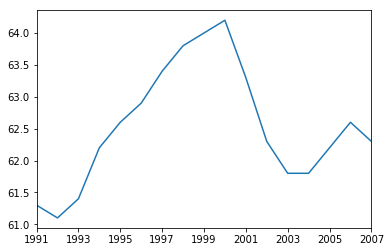

In [69]:
employment_us.plot()

### GDP and life expectancy

In [41]:
# Sample data
countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

In [42]:
# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)


for country_life_expectancy in life_expectancy:
    print 'Examining life expectancy {}'.format(country_life_expectancy)

Examining life expectancy 74.7
Examining life expectancy 75.0
Examining life expectancy 83.4
Examining life expectancy 57.6
Examining life expectancy 74.6
Examining life expectancy 75.4
Examining life expectancy 72.3
Examining life expectancy 81.5
Examining life expectancy 80.2
Examining life expectancy 70.3
Examining life expectancy 72.1
Examining life expectancy 76.4
Examining life expectancy 68.1
Examining life expectancy 75.2
Examining life expectancy 69.8
Examining life expectancy 79.4
Examining life expectancy 70.8
Examining life expectancy 62.7
Examining life expectancy 67.3
Examining life expectancy 70.6


Describing the data:

In [44]:
print life_expectancy.mean()
print life_expectancy.std()
print gdp.max()
print gdp.sum()

72.87
6.21399947487
27036.4873319
182957.59833


Function that takes in life expectancy and GDP and checks whether they are related

* When a country has a life expectancy above the mean, is the GDP above the mean also?

Function returns:
* Number of countries where both values are above or both are below the mean 
* Number of countries where one value is above and one is below the mean 

For example, if the inputs were pd.Series([1, 2, 3, 4]) and pd.Series([4, 5, 6, 7]), then the output would be (4, 0). This is because 1 and 4 are both below their means, 2 and 5 are both below, 3 and 6 are both above, and 4 and 7 are both above. On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and pd.Series([7, 6, 5, 4]), then the output would be (0, 4). This is because 1 is below its mean but 7 is above its mean.

In [38]:
def variable_correlation(variable1, variable2):
    # data points in the same direction as a boolean 
    both_above = (variable1 > variable1.mean()) & \
                (variable2 > variable2.mean())
    # data points in different directions as a boolean     
    both_below = (variable1 < variable1.mean()) & \
                (variable2 < variable2.mean())
        
    is_same_direction = both_above | both_below 
    num_same_direction = is_same_direction.sum() 
    
    num_different_direction = len(variable1) - num_same_direction
    
    return (num_same_direction, num_different_direction)

In [39]:
variable_correlation(life_expectancy, gdp)

(17, 3)

This means there were 17 pairs of data points going in the same direction, and 3 pairs of data points going in opposite directions. Since the first number is large and the second number is small, there is a positive correlation. When one is large, the other is small.